<a href="https://colab.research.google.com/github/shubham9875/EDAProjectFinal/blob/main/EDAProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [258]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
pf=pd.read_csv("/content/drive/MyDrive/eda proj/train 2.csv")

In [260]:
pf.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [261]:
pf.shape

(550068, 12)

In [262]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [263]:
pf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [264]:
pf.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [265]:
pf.rename(columns={'User_ID':'u_id','Product_ID':'p_id','Gender':'gender', 'Age':'age','Occupation':'occupation',
                    'City_Category':'city_category','Stay_In_Current_City_Years':'years', 'Marital_Status':'marital',
                     'Product_Category_1': 'product1','Product_Category_2':'product2', 'Product_Category_3':'product3',
                     'Purchase':'purchase'},inplace = True)


In [266]:
pf.isnull().sum()

u_id                  0
p_id                  0
gender                0
age                   0
occupation            0
city_category         0
years                 0
marital               0
product1              0
product2         173638
product3         383247
purchase              0
dtype: int64

In [267]:
pf.duplicated().sum()

0

In [268]:
category = pf.loc[:,['product1', 'product2', 'product3']]
category.describe()

,product1,product2,product3
count,550068.000000,376430.000000,166821.000000
mean,5.404270,9.842329,12.668243
std,3.936211,5.086590,4.125338
min,1.000000,2.000000,3.000000
25%,1.000000,5.000000,9.000000
50%,5.000000,9.000000,14.000000
75%,8.000000,15.000000,16.000000
max,20.000000,18.000000,18.000000


In [269]:
# Droping user id

In [270]:
# Here we are dropping product_id column as there is no need of that columns in data 
pf.drop(['u_id'],inplace = True, axis = 'columns')
pf.drop(['p_id'],inplace = True, axis = 'columns')

In [271]:
pf.head()

,gender,age,occupation,city_category,years,marital,product1,product2,product3,purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [272]:
# we dont need + in 4+ years in city column
# so we will remove them 

pf['years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [273]:
def cities(value):
    if '+' in value:
        value = value.replace('+','')
        return int(value)
    else:
        return int(value)

pf['years'] = pf['years'].apply(cities)

In [274]:
pf['years'].dtype

dtype('int64')

In [275]:
pf['years'].unique()

array([2, 4, 3, 1, 0])

In [276]:
#genders
pf['gender'].unique()

array(['F', 'M'], dtype=object)

In [277]:
pf['gender'].dtype

dtype('O')

In [278]:
# Age
pf['age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [279]:
pf.head(3)

,gender,age,occupation,city_category,years,marital,product1,product2,product3,purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [280]:
# As age is present in range so now we convert the range into particular name like

# 0-17 -> child
# 18-25 -> teen
# 26-35 -> young adult
# 36-45 -> mid adult
# 46-50 -> old adult
# 51-55 -> early old
# 55+ -> old


pf['age'] = pf['age'].map({'0-17': 'Child', '18-25': 'Teen', '26-35': 'Young Adult', '36-45': 'Mid Adult', '46-50': 'Old Adult', '51-55': 'Early Old', '55+': 'Old'})
        

In [281]:
pf.head(10)

,gender,age,occupation,city_category,years,marital,product1,product2,product3,purchase
0,F,Child,10,A,2,0,3,NaN,NaN,8370
1,F,Child,10,A,2,0,1,6.0,14.0,15200
2,F,Child,10,A,2,0,12,NaN,NaN,1422
3,F,Child,10,A,2,0,12,14.0,NaN,1057
4,M,Old,16,C,4,0,8,NaN,NaN,7969
5,M,Young Adult,15,A,3,0,1,2.0,NaN,15227
6,M,Old Adult,7,B,2,1,1,8.0,17.0,19215
7,M,Old Adult,7,B,2,1,1,15.0,NaN,15854
8,M,Old Adult,7,B,2,1,1,16.0,NaN,15686
9,M,Young Adult,20,A,1,1,8,NaN,NaN,7871


In [282]:
pf['age'].unique()

array(['Child', 'Old', 'Young Adult', 'Old Adult', 'Early Old',
       'Mid Adult', 'Teen'], dtype=object)

In [283]:
pf.isnull().sum()

gender                0
age                   0
occupation            0
city_category         0
years                 0
marital               0
product1              0
product2         173638
product3         383247
purchase              0
dtype: int64

In [284]:
#replacing null values in product 2
pf['product2']=pf['product2'].fillna(pf['product2'].mode()[0])


In [285]:
#replacing null values in product 3
pf['product3']=pf['product3'].fillna(pf['product3'].mode()[0])


In [286]:
pf.head()

,gender,age,occupation,city_category,years,marital,product1,product2,product3,purchase
0,F,Child,10,A,2,0,3,8.0,16.0,8370
1,F,Child,10,A,2,0,1,6.0,14.0,15200
2,F,Child,10,A,2,0,12,8.0,16.0,1422
3,F,Child,10,A,2,0,12,14.0,16.0,1057
4,M,Old,16,C,4,0,8,8.0,16.0,7969


In [287]:
# Visualization


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

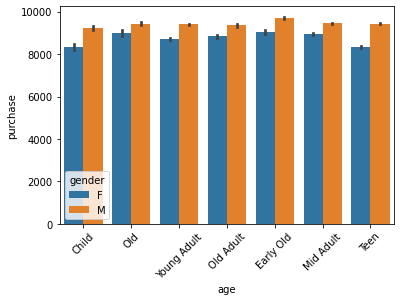

In [293]:
plt.figure(figsize=(6,4))
sns.barplot('age','purchase',hue='gender',data=pf)
plt.xticks(rotation=45)


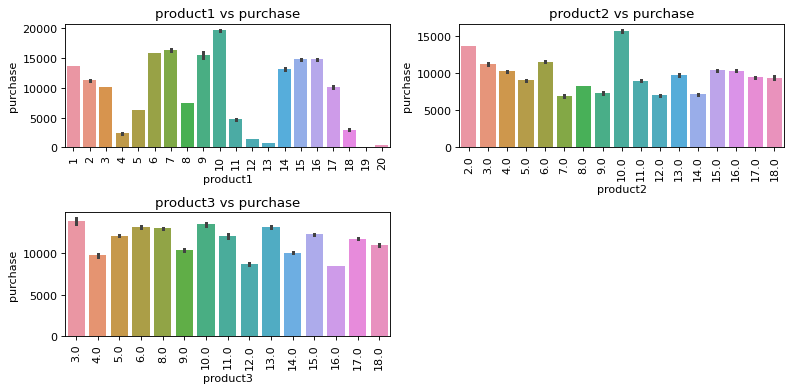

In [294]:
plt.figure(figsize=(10,5),dpi=80)
plt.subplot(2,2,1)
plt.title('product1 vs purchase')
sns.barplot(x='product1',y='purchase',data=pf)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('product2 vs purchase')
sns.barplot(x='product2',y='purchase',data=pf)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('product3 vs purchase')
sns.barplot(x='product3',y='purchase',data=pf)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [290]:
#sns.pairplot(pf)